# Data Analysis: large variances in a trait of your choice correspond to variation of an environmental covariate (trees)
Day 4 - Workshop session for the NDFI4Biodiversity Seasonal School 2024 by Maria Judith Carmona H.

In [12]:
# Load lybraries
library(tidyverse)

ERROR: Error in library("here"): there is no package called ‘here’


In [13]:
library(readr)

trydb <- read_csv("https://raw.githubusercontent.com/NFDI4Biodiversity/SeasonalSchool2024/refs/heads/main/day4/practical_session4/data/try_reduced.csv")
gbif <- read_csv("https://raw.githubusercontent.com/NFDI4Biodiversity/SeasonalSchool2024/refs/heads/main/day4/practical_session4/data/gbif1.csv")

New names:
• `` -> `...1`
Rows: 52323 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): SpeciesName, TraitName, UnitName
dbl (2): ...1, StdValue

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 255873 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): class, scientificName, countryCode, species
dbl (2): x, y

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [ ]:
For the time being we add some dummy covariates to the gbif data, that will be replaced with real data later

In [20]:
trydb$TraitName |> unique() 

# pick "plant height vegetative"
try_height <- trydb |> filter(TraitName == "Plant height vegetative") |> 
  group_by(SpeciesName) |> 
  summarise(var_height = sd(StdValue, na.rm = TRUE), n = n())

# Summarize environmentla covariate
gbif_temp <- gbif |> group_by(species) |> 
  summarize(var_temp = var(temp_1, na.rm = TRUE))

dat <- left_join(gbif_temp, try_height, by = c("species" = "SpeciesName"))

[1] "Seed dry mass"                                                                                          
 [2] "Stem specific density (SSD, stem dry mass per stem fresh volume) or wood density"                       
 [3] "Leaf nitrogen (N) content per leaf dry mass"                                                            
 [4] "Leaf phosphorus (P) content per leaf dry mass"                                                          
 [5] "Leaf dry mass per leaf fresh mass (leaf dry matter content, LDMC)"                                      
 [6] "Leaf nitrogen (N) isotope signature (delta 15N)"                                                        
 [7] "Plant height vegetative"                                                                                
 [8] "Leaf carbon (C) content per leaf dry mass"                                                              
 [9] "Leaf area (in case of compound leaves: leaflet, undefined if petiole is in- or excluded)"               
[10] "Seed number per reproducton unit"                                                                       
[11] "Leaf area per leaf dry mass (specific leaf area, SLA or 1/LMA): undefined if petiole is in- or excluded"
[12] "Leaf nitrogen (N) content per leaf area"                                                                
[13] "Dispersal unit length"                                                                                  
[14] "Seed length"                                                                                            
[15] "Stem conduit density (vessels and tracheids)"                                                           
[16] "Leaf nitrogen/phosphorus (N/P) ratio"                                                                   
[17] "Leaf fresh mass"

SpeciesName,TraitName,n
<chr>,<chr>,<int>
Quercus robur,Plant height vegetative,5981
Pinus sylvestris,Leaf nitrogen (N) content per leaf dry mass,2291
Fagus sylvatica,"Leaf dry mass per leaf fresh mass (leaf dry matter content, LDMC)",1786
Fagus sylvatica,"Leaf area per leaf dry mass (specific leaf area, SLA or 1/LMA): undefined if petiole is in- or excluded",1722
Pinus sylvestris,Leaf phosphorus (P) content per leaf dry mass,1660
Quercus petraea,Leaf nitrogen (N) content per leaf dry mass,1447
Fagus sylvatica,Leaf fresh mass,1360
Picea abies,Leaf nitrogen (N) content per leaf dry mass,1311
Pinus sylvestris,"Stem specific density (SSD, stem dry mass per stem fresh volume) or wood density",1300


Warning message:
“Removed 13 rows containing missing values or values outside the scale range
(`geom_point()`).”


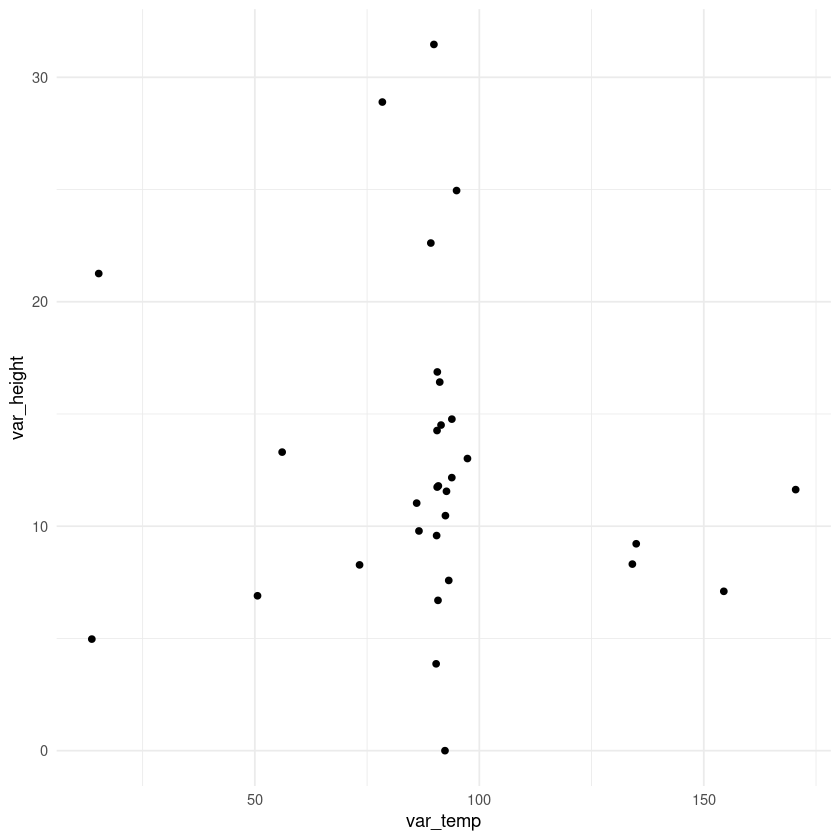

In [19]:
# Create plots 
ggplot(dat, aes(var_temp, var_height)) + geom_point()